In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles



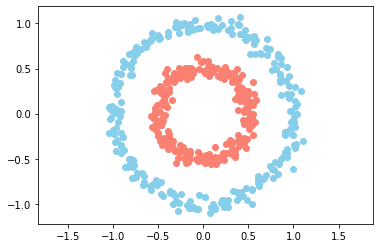

In [0]:
# crear el dataset

n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
Y = Y[:, np.newaxis]
#print(Y)
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

#empezamos a programar la red neuronal 
#La red neuronal su unidad de procesamiento es la neurona. Podemos combinar muchas neuronas en diferentes capas para conseguir esta codificacion. Todas las fotmulas a utilizar tienen la posibilidad de vectorizar.
#Dentro de una capa estamos realizando las mismas operaciones de todas las neuronas (porque tienen la misma funcion de activacion, las formulas de backpropagation)
#Podemos pensar que cada capa es un modulo. Dentro de una misma capa van a realizarse las mismas operaciones
#vamos a definir en la red neuronal una clase que se refiera a una capa

In [0]:
#CLASE DE LA CAPA DE LA RED

class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):   #n_conn=numero de conexiones, n_neur=numero de neuronas, act_f=funcion de activacion
    self.act_f = act_f
    self.b=np.random.rand(1, n_neur) * 2 - 1             #b=parametro de bayes
    self.W=np.random.rand(n_conn, n_neur) * 2 - 1 

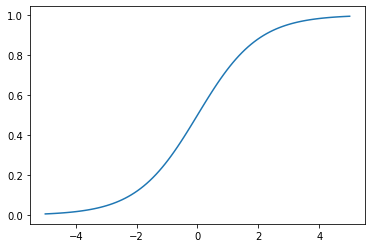

In [0]:
# FUNCIONES DE ACTIVACION
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1-x))
relu = lambda x: np.maximum(0,x)
_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[0](_x))

In [0]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
#...

def create_nn(topology, act_f):
  nn = []
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))   #objeto de la clase
  return nn

topology = [p, 4, 8, 16, 8, 4, 1]    #vector
create_nn(topology, sigm)

Se observa que se tiene 6 capas ocultas
con esto ya tenemos nuestra red neuronal creada
Soporta nuestra red neuronal

Ahora vamos a crear la logica que nos va a permitir entrenar nuestra red

In [0]:

#definimos una funcion que se va a encatgar de ejecutar el codigo que se va  a encargar la red neuronal
p=2
topology = [p, 4, 8, 1]    #vector
neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))


def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

  out = [(None, X)]            #vector donde se guarda la informacion
  
  #FORWARD PASS 
  for l, layer in enumerate(neural_net):
    
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b   #se ha implementado la suma ponderada en cada capa
    a = neural_net[l].act_f[0](z)

    out.append((z,a))

  

  if train:

    #Backward pass
    deltas = []
    
    for l in reversed(range(0, len(neural_net))):
      z = out[l+1][0]
      a =  out[l+1][1]

      

      if l == len(neural_net) - 1:
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))  #la formula con la cual calculamos delta0 
        #print(deltas.shape)
        #calcular delta ultima capa
      else:
        deltas.insert(0, deltas[0] @  _W.T * neural_net[l].act_f[1](a))
        #calcular delta respecto a capa previa
      _W = neural_net[l].W  
    
    #Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr 
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr 

  return out[-1][1]
     


train(neural_net, X, Y, l2_cost, 0.5)
print("")

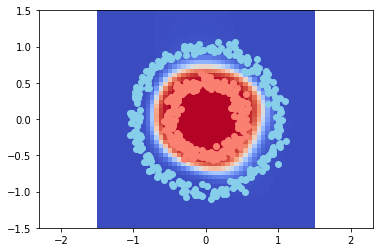

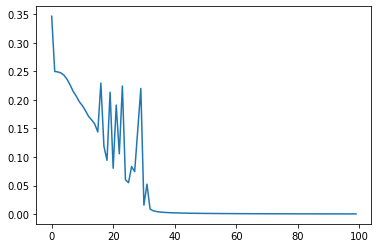

In [0]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(l2_cost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  